In [3]:
import pandas as pd, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import plotly.express as pe 
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
df = pd.read_excel(os.getcwd()+"\\data\\prod_forecast.xlsx")
df

,product_id,plnt_id,mat_id,plan_ww,fcst_qty,ship_qty,error
0,99AN,FL,99AN,202143,1431,2250,0.388753
1,99AN,FL,99AN,202144,339,60,0.849624
2,99AN,FL,99AN,202145,60,85,0.413793
3,99AN,FL,99AN,202146,84,70,0.545455
4,99AN,FL,99AN,202147,3870,5780,0.401036
5,99AN,FL,99AN,202148,4743,4395,0.519041
6,99AN,FL,99AN,202149,2121,1175,0.643507
7,99AN,FL,99AN,202150,342,160,0.681275
8,99AN,FL,99AN,202151,60,60,0.500000
9,99AN,FL,99AN,202152,5376,6460,0.454208


In [5]:
kde_dist = gaussian_kde(df['fcst_qty'], bw_method='scott')

In [6]:
(df['fcst_qty'].min(), df['fcst_qty'].max())

(2, 5376)

In [10]:
x = np.linspace(df['fcst_qty'].min()*0.9, df['fcst_qty'].max() * 1.1, 90)
x

array([1.80000000e+00, 6.82247191e+01, 1.34649438e+02, 2.01074157e+02,
       2.67498876e+02, 3.33923596e+02, 4.00348315e+02, 4.66773034e+02,
       5.33197753e+02, 5.99622472e+02, 6.66047191e+02, 7.32471910e+02,
       7.98896629e+02, 8.65321348e+02, 9.31746067e+02, 9.98170787e+02,
       1.06459551e+03, 1.13102022e+03, 1.19744494e+03, 1.26386966e+03,
       1.33029438e+03, 1.39671910e+03, 1.46314382e+03, 1.52956854e+03,
       1.59599326e+03, 1.66241798e+03, 1.72884270e+03, 1.79526742e+03,
       1.86169213e+03, 1.92811685e+03, 1.99454157e+03, 2.06096629e+03,
       2.12739101e+03, 2.19381573e+03, 2.26024045e+03, 2.32666517e+03,
       2.39308989e+03, 2.45951461e+03, 2.52593933e+03, 2.59236404e+03,
       2.65878876e+03, 2.72521348e+03, 2.79163820e+03, 2.85806292e+03,
       2.92448764e+03, 2.99091236e+03, 3.05733708e+03, 3.12376180e+03,
       3.19018652e+03, 3.25661124e+03, 3.32303596e+03, 3.38946067e+03,
       3.45588539e+03, 3.52231011e+03, 3.58873483e+03, 3.65515955e+03,
      

In [9]:
y_kde = kde_dist.pdf(x)
y_kde

array([2.03997516e-04, 2.08297718e-04, 2.12144820e-04, 2.15519124e-04,
       2.18404774e-04, 2.20789855e-04, 2.22666426e-04, 2.24030510e-04,
       2.24882018e-04, 2.25224635e-04, 2.25065663e-04, 2.24415820e-04,
       2.23289016e-04, 2.21702108e-04, 2.19674625e-04, 2.17228497e-04,
       2.14387771e-04, 2.11178326e-04, 2.07627596e-04, 2.03764302e-04,
       1.99618185e-04, 1.95219767e-04, 1.90600110e-04, 1.85790602e-04,
       1.80822742e-04, 1.75727953e-04, 1.70537397e-04, 1.65281800e-04,
       1.59991289e-04, 1.54695235e-04, 1.49422101e-04, 1.44199293e-04,
       1.39053020e-04, 1.34008152e-04, 1.29088087e-04, 1.24314619e-04,
       1.19707812e-04, 1.15285885e-04, 1.11065101e-04, 1.07059670e-04,
       1.03281661e-04, 9.97409342e-05, 9.64450841e-05, 9.33994057e-05,
       9.06068784e-05, 8.80681718e-05, 8.57816737e-05, 8.37435405e-05,
       8.19477708e-05, 8.03863004e-05, 7.90491190e-05, 7.79244068e-05,
       7.69986894e-05, 7.62570085e-05, 7.56831079e-05, 7.52596293e-05,
      

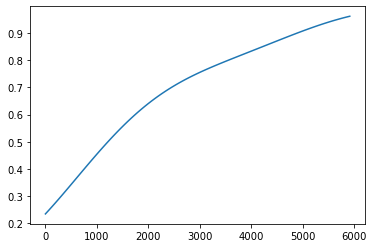

In [10]:
def kde_cdf(kde_dist,x):
  cdf = []
  for value in x:
    cdf.append(kde_dist.integrate_box_1d(-np.inf,value))
  return cdf
plt.plot(x,kde_cdf(kde_dist,x))

90

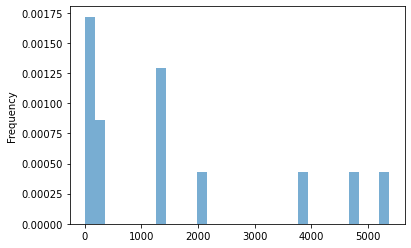

In [36]:
import matplotlib.patches as mpatches 
fig, ax = plt.subplots() 
df['fcst_qty'].plot(ax=ax, kind='hist',density=True, bins=30, alpha=0.6)
x = np.linspace(df['fcst_qty'].min() * 0.9, df['fcst_qty'].max()*1.1,90)
len(x)

In [20]:
y_kde = kde_dist.pdf(x)
y_kde

array([2.03997516e-04, 2.08297718e-04, 2.12144820e-04, 2.15519124e-04,
       2.18404774e-04, 2.20789855e-04, 2.22666426e-04, 2.24030510e-04,
       2.24882018e-04, 2.25224635e-04, 2.25065663e-04, 2.24415820e-04,
       2.23289016e-04, 2.21702108e-04, 2.19674625e-04, 2.17228497e-04,
       2.14387771e-04, 2.11178326e-04, 2.07627596e-04, 2.03764302e-04,
       1.99618185e-04, 1.95219767e-04, 1.90600110e-04, 1.85790602e-04,
       1.80822742e-04, 1.75727953e-04, 1.70537397e-04, 1.65281800e-04,
       1.59991289e-04, 1.54695235e-04, 1.49422101e-04, 1.44199293e-04,
       1.39053020e-04, 1.34008152e-04, 1.29088087e-04, 1.24314619e-04,
       1.19707812e-04, 1.15285885e-04, 1.11065101e-04, 1.07059670e-04,
       1.03281661e-04, 9.97409342e-05, 9.64450841e-05, 9.33994057e-05,
       9.06068784e-05, 8.80681718e-05, 8.57816737e-05, 8.37435405e-05,
       8.19477708e-05, 8.03863004e-05, 7.90491190e-05, 7.79244068e-05,
       7.69986894e-05, 7.62570085e-05, 7.56831079e-05, 7.52596293e-05,
      

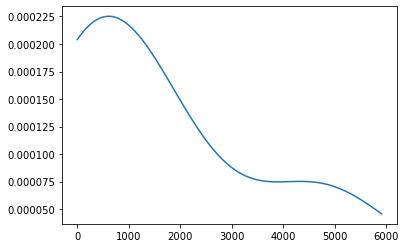

In [21]:
plt.plot(x, y_kde)

PDF example:

In [42]:
from matplotlib import pyplot
from numpy.random import normal
from scipy.stats import *
sample = normal(loc=50, scale=5, size=1000)
dist = norm(np.mean(sample), np.std(sample))
dist.dist.stats


<bound method rv_generic.stats of <scipy.stats._continuous_distns.norm_gen object at 0x000001D685BC0108>>

In [44]:
values = [value for value in range(30,70)]
probabilities = [dist.pdf(value) for value in values]
probabilities

[3.629924908398008e-05,
 7.64477488584542e-05,
 0.00015499381002986873,
 0.00030251478101304307,
 0.0005684096428085304,
 0.0010281556511343229,
 0.0017903539109315554,
 0.0030012453767919965,
 0.004843359559566784,
 0.007524445671315083,
 0.011253429713649035,
 0.016202345435806564,
 0.022457089193778795,
 0.02996481722948279,
 0.03849039736069113,
 0.047596580052252445,
 0.05666066859894872,
 0.06493371247855254,
 0.07163765560432134,
 0.07608430683499323,
 0.07779136718152313,
 0.0765685305688999,
 0.07255240502155755,
 0.06618139336791873,
 0.05811692025157247,
 0.049130577597894604,
 0.039983769965920575,
 0.03132551379399738,
 0.023626275183310837,
 0.01715437523227131,
 0.011990495914518553,
 0.008068298880146017,
 0.005226481318990261,
 0.00325926309820777,
 0.0019566449620183612,
 0.0011308037262165317,
 0.0006291367074896345,
 0.0003369654795826032,
 0.0001737434299785262,
 8.624103548972683e-05]

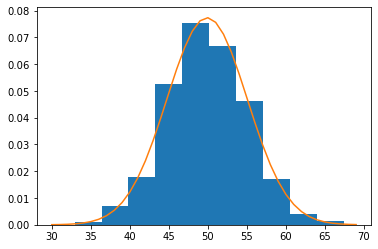

In [35]:
pyplot.hist(sample, bins=10, density=True)
pyplot.plot(values,probabilities)

In [45]:
input = [1431,339,60,84,3870,4743,2121,342,60,5376,1353,2,1380]
prob = [dist.pdf(value) for value in input]
prob


[0.0,
 0.0,
 0.011990495914518553,
 2.458717442134028e-11,
 0.0,
 0.0,
 0.0,
 0.0,
 0.011990495914518553,
 0.0,
 0.0,
 6.262568120979936e-21,
 0.0]

In [46]:
dist = norm(np.mean(input), np.std(input))
dist

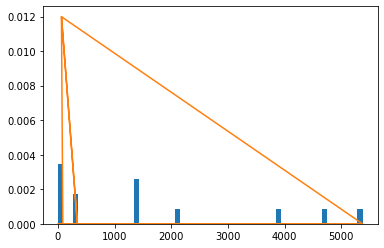

In [49]:
pyplot.hist(input, bins=60, density=True)
pyplot.plot(input,prob)